<div class="alert alert-block alert-danger">
    
### Notes

</div>

### Principal Component Analysis, Numerical python, $ \ldots $.

***

Let $ \mathbf{X}_{i,j} \in \mathbb{R}^{n \times p} $

Centering: $ \mathbf{Z}_{i,j} := \mathbf{X}_{i,j} - \bar{\mathbf{X}}_{j} $

Standardization: $ \mathbf{Z}_{i,j} := \frac{\mathbf{X}_{i,j} - \bar{\mathbf{X}}_{j}}{\mathbf{\S}_{j}} $

Generate covariance matrix: $ \mathbf{\Sigma}_{x} \in \mathbb{R}^{p \times p} $

$\Sigma_{z}$ the covariance matrix for the standardized data $ \mathbf{Z}_{i,j} $ is equal to the correlation matrix for the unstandardized data $ \mathbf{X}_{i,j} $.

Let $\{\lambda_i\}_{i=1}^{p}$ be the eigenvalues and $\mathbf{P} \in \mathbb{R}^{p \times p}$ be the eigenvectors of $ \mathbf{\Sigma}  $ :

Let $ \mathbf{P}^{\prime} $ be the matrix of eigenvectors, sorted in descending order of $\{ \lambda_j \}_{j \in [1, p]}$.

Projection: $ \mathbf{X}^{\prime} := \mathbf{X} \mathbf{P}^{\prime} $

-  First Principal Component
    -  maximum variance subject to the constraint that the sum of the squared coefficients is equal to one.
-  Second Principal Component
    -  second highest variance subject to the constraint that the sums of squared coefficients add up to one and the correlation between the first and second component is 0.
-  i-th Principal Component
    -  i-th highest varhiance subject to the constraint that the sums of squared coefficients add up to one and that this new component is uncorrelated with all the previously defined components.

Selection:
-  Proportion of variance: $\frac{v_i}{\sum_{\forall_{i \in P}} v_i}$
-  Scree plot.

***

<div class="alert alert-block alert-danger">
numpy.linalg's eigenvectors are column-based. v[:,i] is the eigenvector corresponding to the eigenvalue w[i].

sklearn.PCA's eigenvectors are row-based. v[i,:] is the eigenvector corresponding to the eigenvalue w[i].
</div>

***

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

plt.close('all')
np.random.seed(1234)

In [4]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [5]:
data = datasets.load_iris()
X, Y = data.data, data.target

original_df = pd.DataFrame(X, columns=data.feature_names)
original_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
X = StandardScaler().fit_transform(X)
scaled_df = pd.DataFrame(X, columns=data.feature_names)
scaled_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [7]:
pca = PCA(n_components=4)
transforms = pca.fit_transform(X)
principal_df = pd.DataFrame(data=transforms, columns=['principal component 1', 'principal component 2', 'Principal component 3', 'Principal component 4'])
principal_df.head()

,principal component 1,principal component 2,Principal component 3,Principal component 4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923


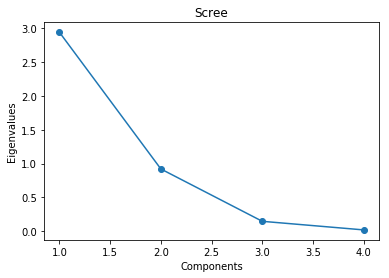

In [8]:
principal_df['Target']=Y
plt.title('Scree')
plt.xlabel('Components'), plt.ylabel('Eigenvalues')
plt.plot([1,2,3,4], pca.explained_variance_, marker='o');

In [9]:
summary_df = pd.DataFrame({'Eigenvalues':pca.explained_variance_})
summary_df['Proportion'] = summary_df/np.sum(summary_df)
summary_df['Cumulative'] = np.cumsum(summary_df['Proportion'])
summary_df

,Eigenvalues,Proportion,Cumulative
0,2.938085,0.729624,0.729624
1,0.920165,0.228508,0.958132
2,0.147742,0.036689,0.994821
3,0.020854,0.005179,1.000000


***
<div class="alert alert-block alert-info">
Verification with Numpy linalg.
</div>

In [10]:
cov_matrix = np.cov(X, rowvar=False)
cov_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [11]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('numpy Eigenvalues: ', eig_vals)
print('sklearn Eigenvalues: ', pca.explained_variance_)

numpy Eigenvalues:  [2.93808505 0.9201649  0.14774182 0.02085386]
sklearn Eigenvalues:  [2.93808505 0.9201649  0.14774182 0.02085386]


<div class="alert alert-block alert-danger">
numpy.linalg's eigenvectors are column-based. v[:,i] is the eigenvector corresponding to the eigenvalue w[i].

sklearn.PCA's eigenvectors are row-based. v[i,:] is the eigenvector corresponding to the eigenvalue w[i].
</div>

In [12]:
print('numpy Eigenvectors: ', eig_vecs, sep='\n')
print('sklearn Eigenvectors: ', pca.components_, sep='\n')

numpy Eigenvectors: 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
sklearn Eigenvectors: 
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


In [13]:
principal_components = X @ eig_vecs
principal_df.head()

,principal component 1,principal component 2,Principal component 3,Principal component 4,Target
0,-2.264703,0.480027,-0.127706,-0.024168,0
1,-2.080961,-0.674134,-0.234609,-0.103007,0
2,-2.364229,-0.341908,0.044201,-0.028377,0
3,-2.299384,-0.597395,0.091290,0.065956,0
4,-2.389842,0.646835,0.015738,0.035923,0


***
<div class="alert alert-block alert-info">
Discriminant Analysis using PCAs.
</div>

In [14]:
pca_da = PCA(n_components=2)
transforms_da = pca_da.fit_transform(X)
principal_df_da = pd.DataFrame(data=transforms_da, columns=['principal component 1', 'principal component 2'])
principal_df_da.head()

,principal component 1,principal component 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [15]:
qda_pca = QuadraticDiscriminantAnalysis(store_covariance=True).fit(transforms_da, Y)
qda_pca_predicts = qda_pca.predict(transforms_da)

print(confusion_matrix(Y, qda_pca_predicts))

[[50  0  0]
 [ 0 43  7]
 [ 0  5 45]]
